In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to fetch and process data
def fetch_and_process(ticker):
    data = yf.Ticker(ticker).history(period="2y")["Close"]
    data.index = pd.to_datetime(data.index).strftime('%Y-%m-%d')
    data.index = pd.to_datetime(data.index)
    return data

# Fetch and process data for WTI Crude Oil and 10-year Treasury yield
wti = fetch_and_process("CL=F").rename("WTI")
treasury = fetch_and_process("^TNX").rename("Treasury")



In [3]:
# Align the data by date and remove any missing values
data = pd.merge(wti, treasury, left_index=True, right_index=True, how='inner')
data = data.dropna()

In [4]:
# Calculate correlations
expanding_corr = data.expanding().corr().unstack()["WTI"]["Treasury"]
rolling_corr = data.rolling(window=60).corr().unstack()["WTI"]["Treasury"]

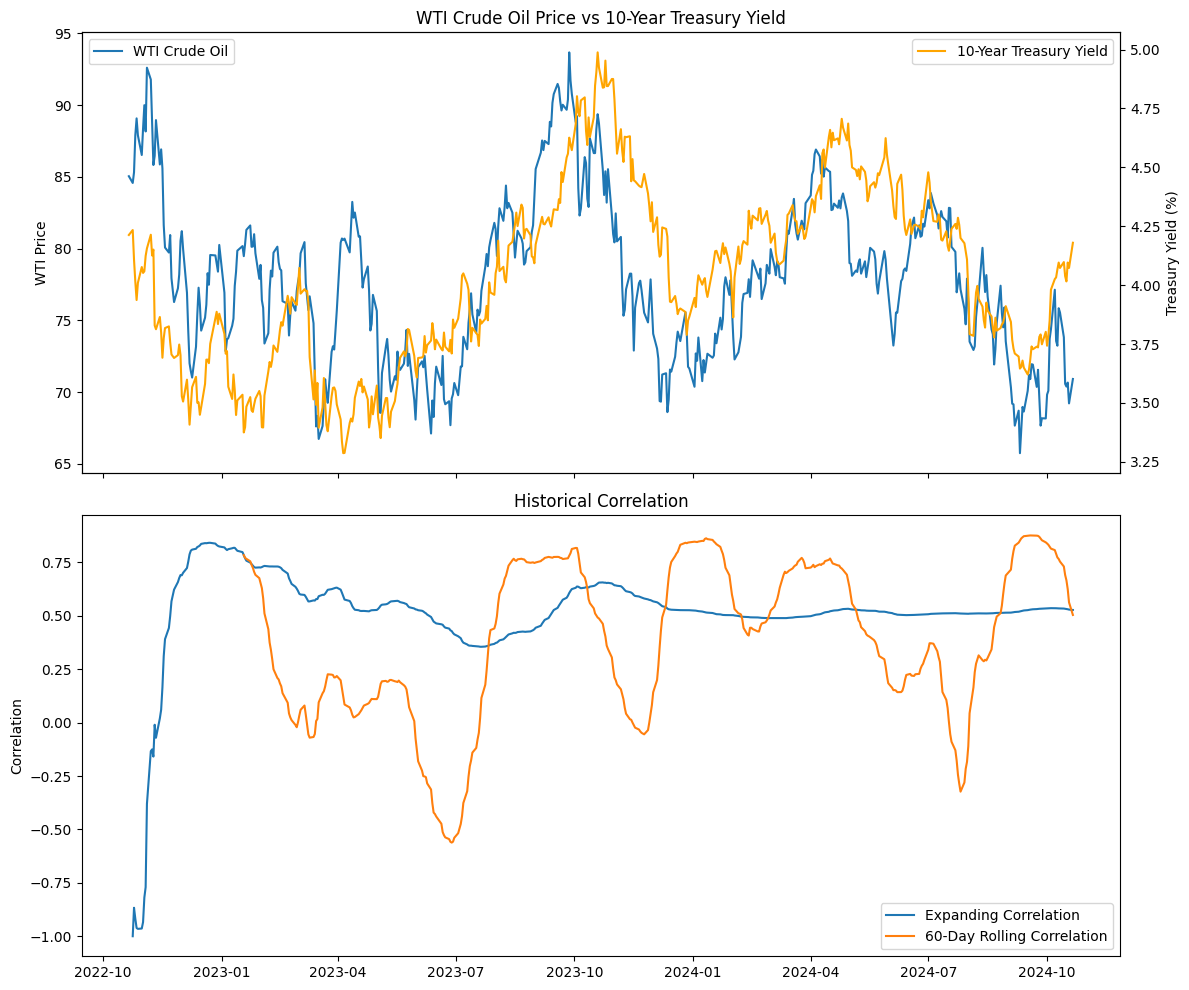

In [5]:

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Panel 1: WTI and Treasury yield
ax1.plot(data.index, data["WTI"], label="WTI Crude Oil")
ax1.set_ylabel("WTI Price")
ax1_2 = ax1.twinx()
ax1_2.plot(data.index, data["Treasury"], color="orange", label="10-Year Treasury Yield")
ax1_2.set_ylabel("Treasury Yield (%)")
ax1.legend(loc="upper left")
ax1_2.legend(loc="upper right")
ax1.set_title("WTI Crude Oil Price vs 10-Year Treasury Yield")

# Panel 2: Correlations
ax2.plot(data.index, expanding_corr, label="Expanding Correlation")
ax2.plot(data.index, rolling_corr, label="60-Day Rolling Correlation")
ax2.set_ylabel("Correlation")
ax2.legend()
ax2.set_title("Historical Correlation")

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# Import the data from tab 4 of your Excel file
election_odds = pd.read_excel('F:/DerekS/My Projects/Python/Meeder1/Five Thirty Eight Election Odds.xlsx', sheet_name='Sheet3')
election_odds['Date'] = pd.to_datetime(election_odds['Date']).dt.strftime('%Y-%m-%d')
election_odds.set_index('Date', inplace=True)

In [7]:
# Convert index to datetime for both datasets
data.index = pd.to_datetime(data.index)
election_odds.index = pd.to_datetime(election_odds.index)
# Merge all datasets
all_data = pd.merge(data, election_odds, left_index=True, right_index=True, how='outer')
all_data = all_data.sort_index().ffill()  # Forward fill missing values

In [8]:
# Check for any non-datetime index values
print(all_data.index[pd.to_datetime(all_data.index, errors='coerce').isna()])

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [9]:
# Remove any rows with invalid datetime index values
data = data[pd.to_datetime(data.index, errors='coerce').notna()]
election_odds = election_odds[pd.to_datetime(election_odds.index, errors='coerce').notna()]

In [38]:
# Merge all datasets
all_data = pd.merge(data, election_odds, left_index=True, right_index=True, how='outer')
all_data = all_data.sort_index()
all_data = all_data.ffill()  # Forward fill missing values

In [39]:
# Calculate expanding and rolling correlations
expanding_corr = all_data['Treasury'].expanding(min_periods=30).corr(all_data['Republican Odds'])
rolling_corr = all_data['Treasury'].rolling(window=30).corr(all_data['Republican Odds'])

In [40]:
from datetime import timedelta
# 1. Ensure the date column is in datetime format
#all_data['Date'] = pd.to_datetime(all_data['Date'])

# 2. Calculate the date 90 days ago from the latest date in the DataFrame
latest_date = all_data.index.max()
date_90_days_ago = latest_date - timedelta(days=90)

# 3. Filter the DataFrame to include only the last 90 days of data
last_90_days_data = all_data[all_data.index > date_90_days_ago]
last_90_days_data_expanding_corr = expanding_corr[expanding_corr.index > date_90_days_ago]
last_90_days_data_rolling_corr = rolling_corr[rolling_corr.index > date_90_days_ago]

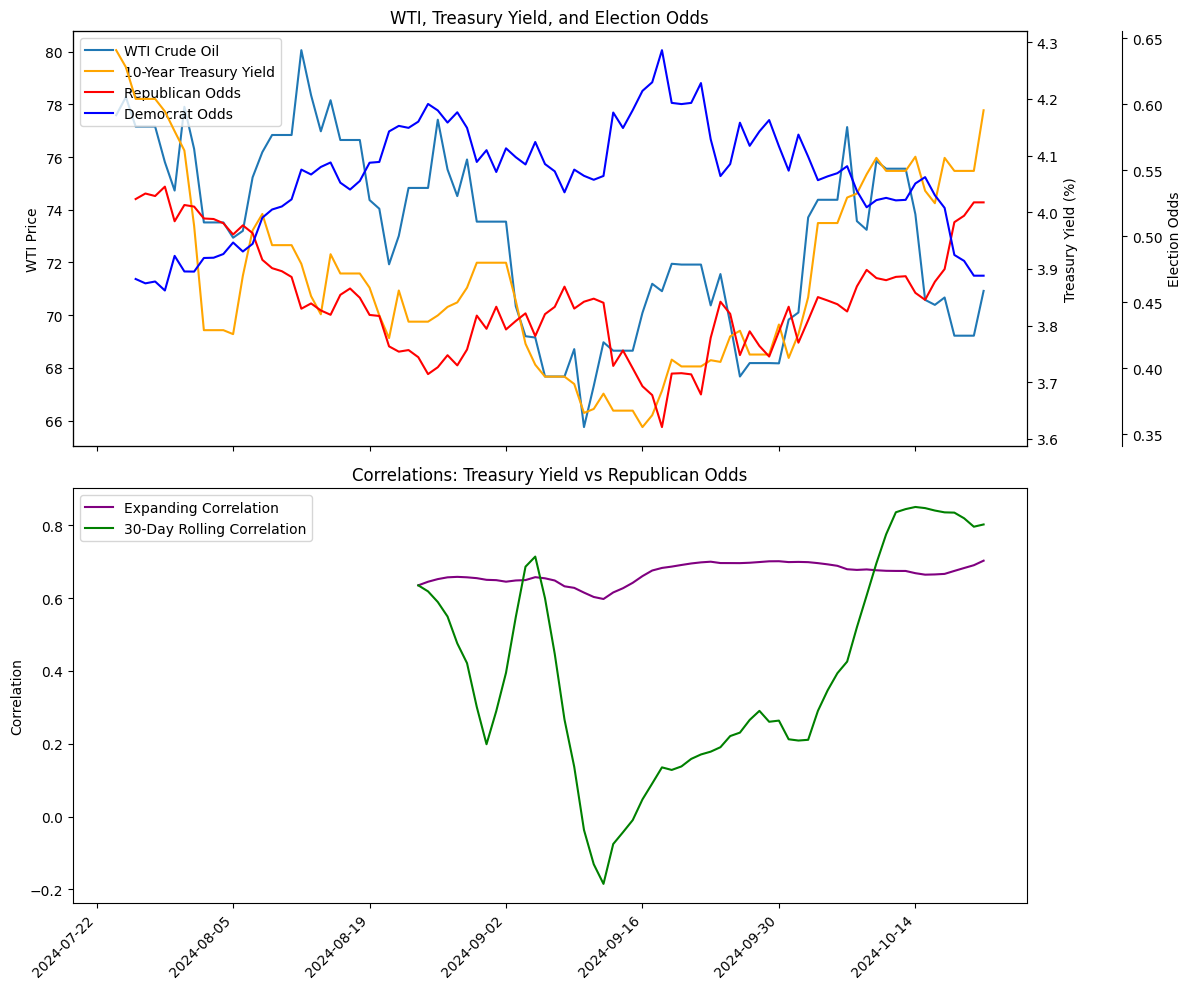

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming all_data is your merged DataFrame with the last 90 days of data

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Panel 1: WTI, Treasury yield, and Election odds
ax1.plot(last_90_days_data.index, last_90_days_data["WTI"], label="WTI Crude Oil")
ax1.set_ylabel("WTI Price")
ax1_2 = ax1.twinx()
ax1_2.plot(last_90_days_data.index, last_90_days_data["Treasury"], color="orange", label="10-Year Treasury Yield")
ax1_2.set_ylabel("Treasury Yield (%)")
ax1_3 = ax1.twinx()
ax1_3.spines["right"].set_position(("axes", 1.1))
ax1_3.plot(last_90_days_data.index, last_90_days_data["Republican Odds"], color="red", label="Republican Odds")
ax1_3.plot(last_90_days_data.index, last_90_days_data["Democrat Odds"], color="blue", label="Democrat Odds")
ax1_3.set_ylabel("Election Odds")

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_2.get_legend_handles_labels()
lines3, labels3 = ax1_3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

ax1.set_title("WTI, Treasury Yield, and Election Odds")

# Panel 2: Expanding and Rolling Correlations
ax2.plot(last_90_days_data_expanding_corr.index, last_90_days_data_expanding_corr, label="Expanding Correlation", color='purple')
ax2.plot(last_90_days_data_rolling_corr.index, last_90_days_data_rolling_corr, label="30-Day Rolling Correlation", color='green')
ax2.set_ylabel("Correlation")
ax2.legend()
ax2.set_title("Correlations: Treasury Yield vs Republican Odds")

# Format x-axis to show dates as YYYY-MM-DD
for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=2))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()